                           MSE        R2
LinearRegression  1.008901e+10  0.917997
RandomForest      1.446303e+10  0.882445
GradientBoosting  1.198334e+10  0.902600
SVM               1.231597e+11 -0.001034


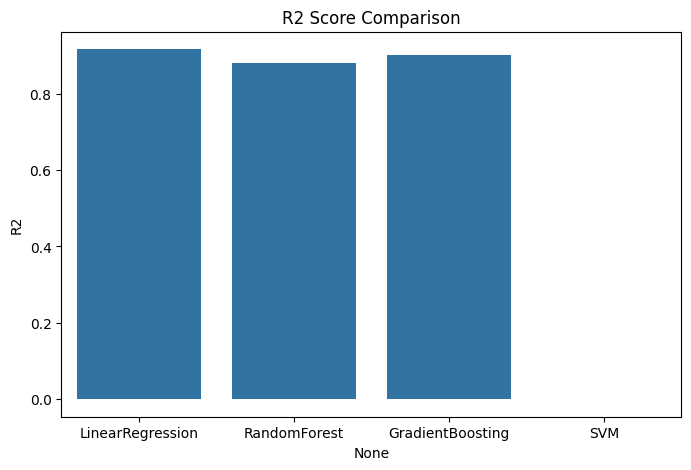

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/USA_Housing.csv')
X = df.drop(['Price', 'Address'], axis=1) # Drop 'Address' column
y = df['Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVM': SVR()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('R2 Score Comparison')
plt.show()